# Information

| Column Name| Description |
| --- | --- |
| customerID | customer id |
| gender | client gender (male / female) |
| SeniorCitizen | is the client retired (1, 0) |
| Partner | is the client married (Yes, No) |
| tenure | how many months a person has been a client of the company |
| PhoneService | is the telephone service connected (Yes, No) |
| MultipleLines | are multiple phone lines connected (Yes, No, No phone service) |
| InternetService | client's Internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | is the online security service connected (Yes, No, No internet service) |
| OnlineBackup | is the online backup service activated (Yes, No, No internet service) |
| DeviceProtection | does the client have equipment insurance (Yes, No, No internet service) |
| TechSupport | is the technical support service connected (Yes, No, No internet service) |
| StreamingTV | is the streaming TV service connected (Yes, No, No internet service) |
| StreamingMovies | is the streaming cinema service activated (Yes, No, No internet service) |
| Contract | type of customer contract (Month-to-month, One year, Two year) |
| PaperlessBilling | whether the client uses paperless billing (Yes, No) |
| PaymentMethod | payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | current monthly payment |
| TotalCharges | the total amount that the client paid for the services for the entire time |
| Churn | whether there was a churn (Yes or No) |

Churn is the measure of how many customers stop using a product. This can be measured based on actual usage or failure to renew (when the product is sold using a subscription model).

In [364]:
import pandas as pd

df=pd.read_csv("telecom_users.csv")
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [365]:
df.select_dtypes(exclude="object")

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
0,1869,0,72,24.10
1,4528,0,44,88.15
2,6344,1,38,74.95
3,6739,0,4,55.90
4,432,0,2,53.45
...,...,...,...,...
5981,3772,0,1,95.00
5982,5191,0,23,91.10
5983,5226,0,12,21.15
5984,5390,1,12,99.45


In [366]:
df.drop(columns=["Unnamed: 0", "customerID"], inplace=True)

# Visualizing Distributions

All distributions will be shown except those related to payment methods, monthly payments, etc...

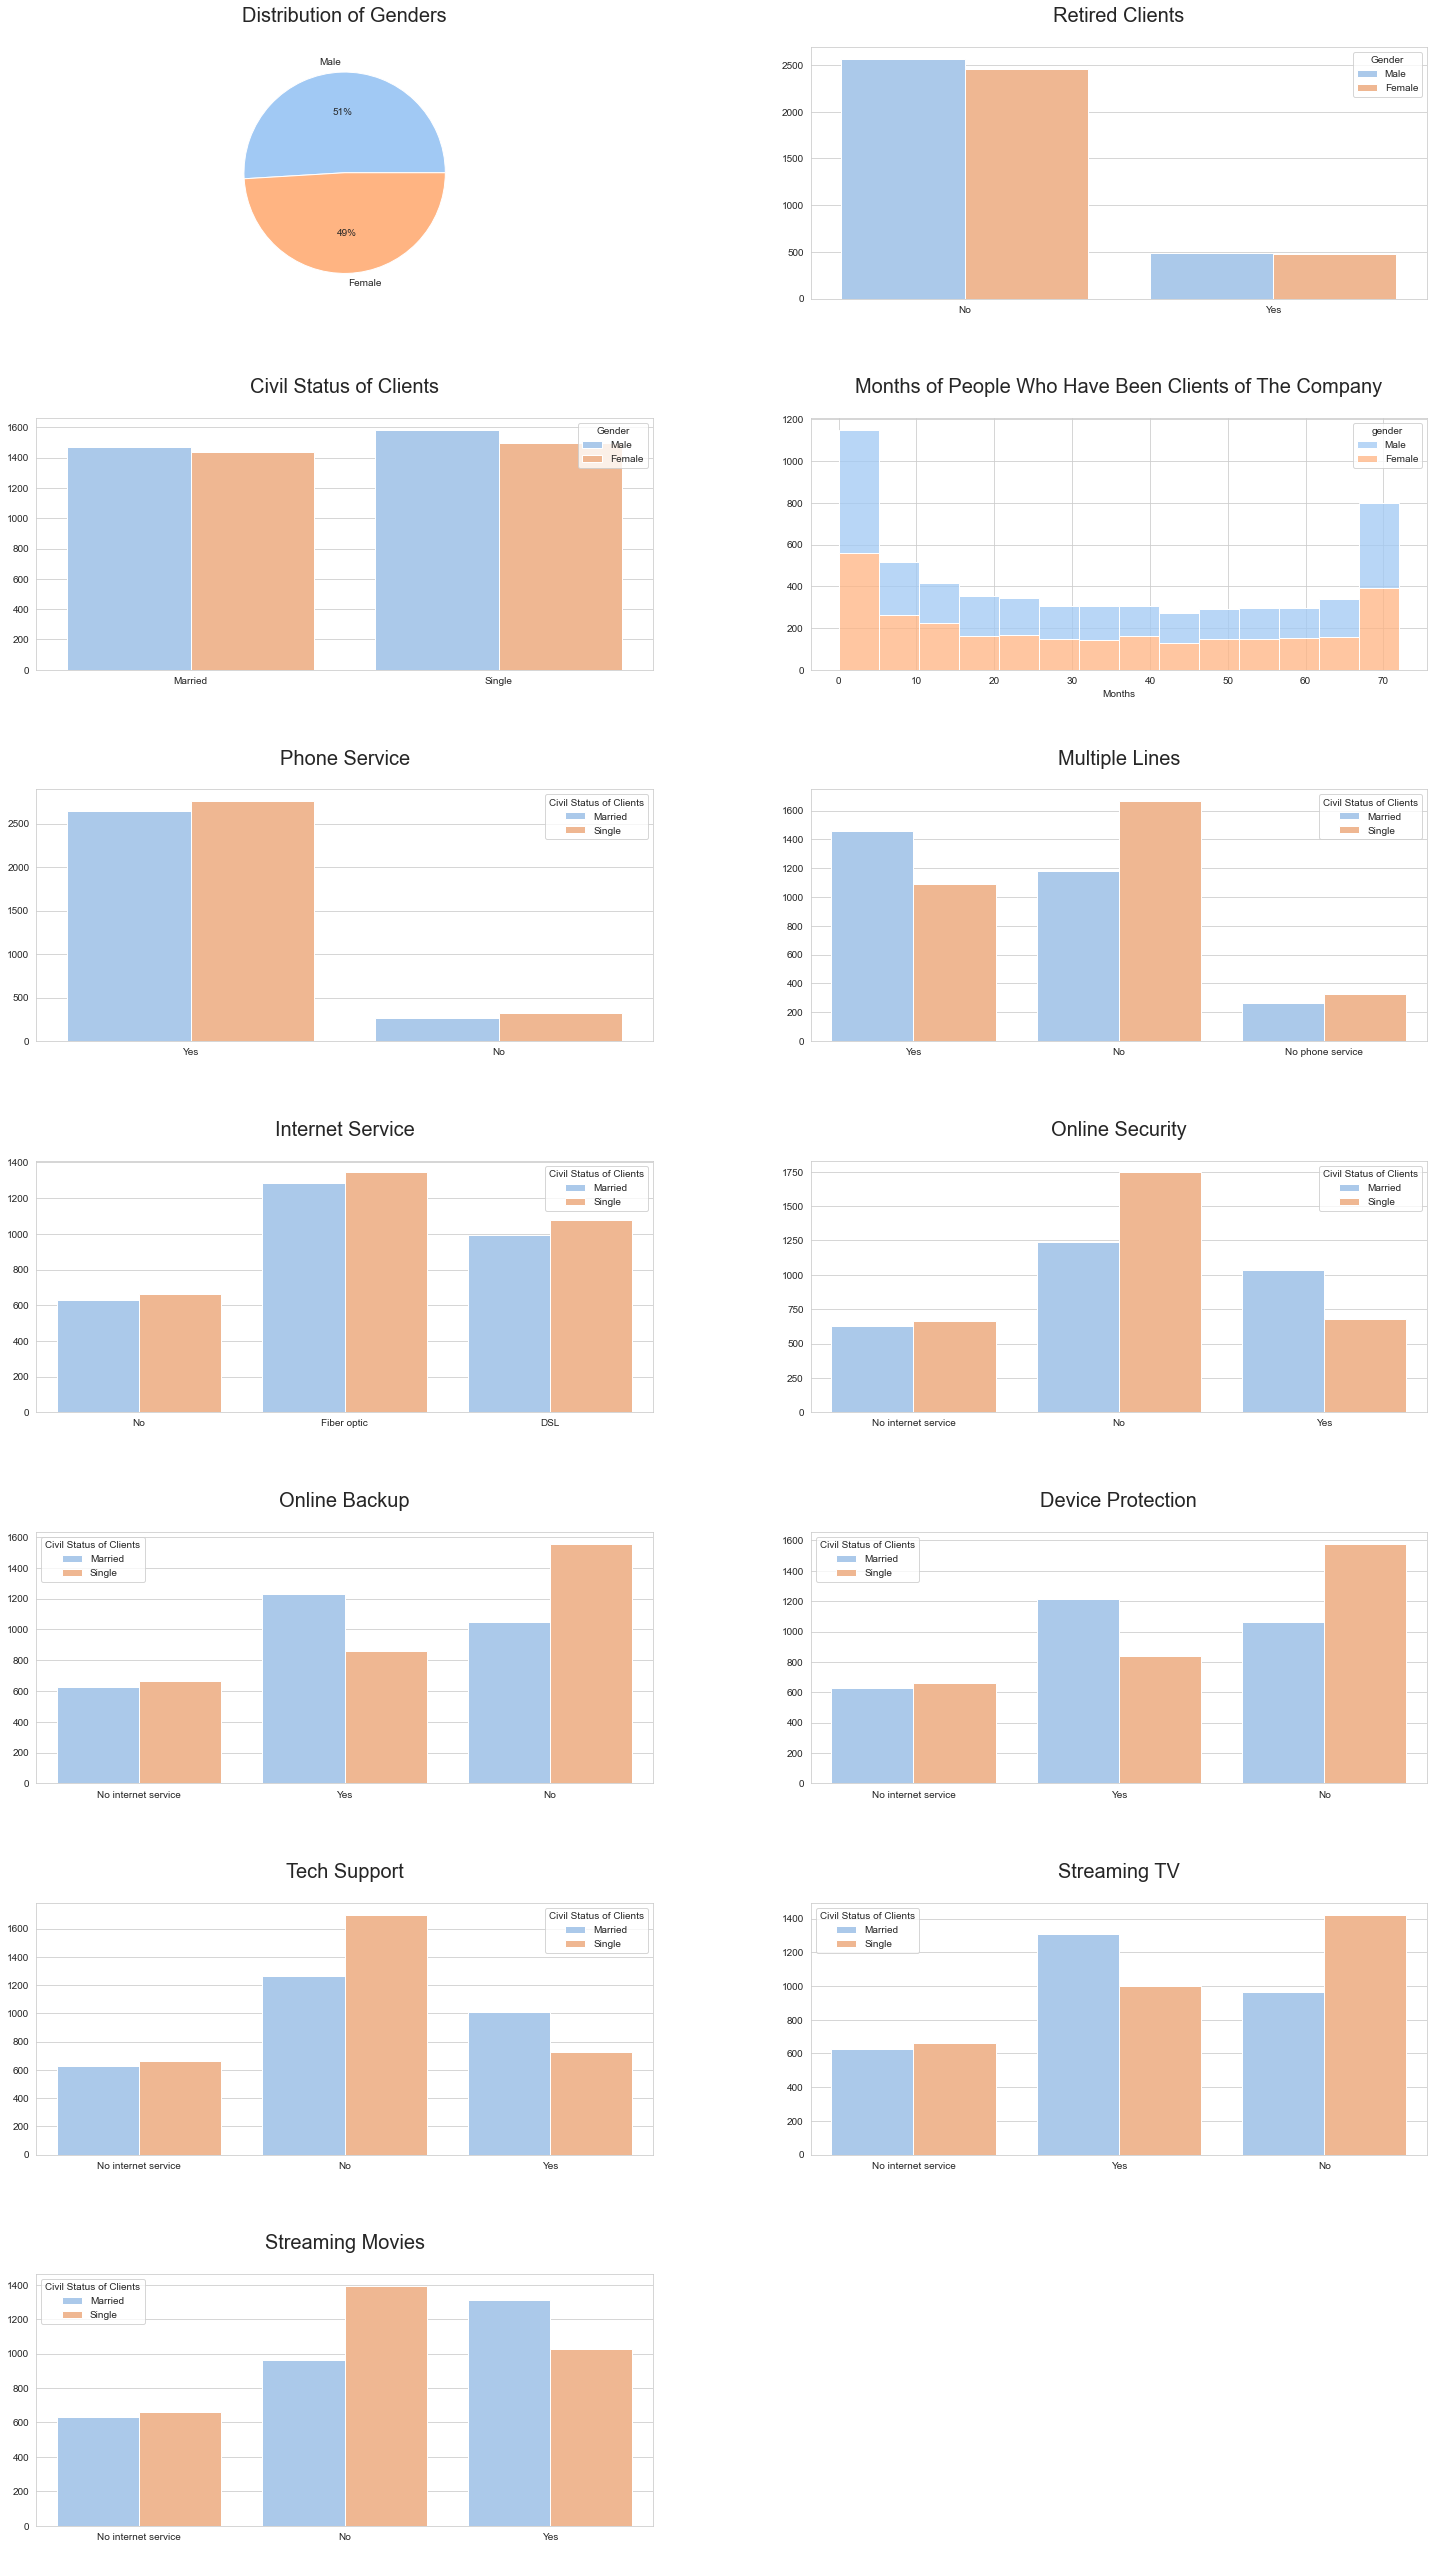

In [367]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, ax=plt.subplots(nrows=7, ncols=2, figsize=(20, 35))
fig.tight_layout(h_pad=10, w_pad=13)

plt.sca(ax[0, 0])
plt.pie(x=df.gender.value_counts(), labels=df.gender.value_counts().index, autopct="%1.0f%%")
ax[0, 0].set_title("Distribution of Genders", fontsize=20, pad=25)

plt.sca(ax[0, 1])
sns.countplot(x=df.SeniorCitizen, hue=df.gender)
ax[0, 1].set_title("Retired Clients", fontsize=20, pad=25)
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.legend(title="Gender")

plt.sca(ax[1, 0])
sns.countplot(x=df.Partner, hue=df.gender)
ax[1, 0].set_title("Civil Status of Clients", fontsize=20, pad=25)
plt.xlabel("")
plt.ylabel("")
ax[1, 0].set_xticklabels(["Married", "Single"])
plt.legend(title="Gender")

plt.sca(ax[1, 1])
sns.histplot(x=df.tenure, hue=df.gender, multiple="stack")
ax[1, 1].set_title("Months of People Who Have Been Clients of The Company", fontsize=20, pad=25)
plt.xlabel("Months")
plt.ylabel("")

services=["Phone Service", "Multiple Lines", "Internet Service", "Online Security", "Online Backup",
          "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies"]
for x in range(len(services)):
    plt.sca(ax[2+(x//2), 0+(x%2)])
    ax[2+(x//2), 0+(x%2)].set_title(services[x], fontsize=20, pad=25)
    sns.countplot(x=df[services[x].replace(" ","")], hue=df.Partner)
    plt.legend(title="Civil Status of Clients", labels=["Married", "Single"])
    plt.xlabel("")
    plt.ylabel("")
    
ax[6, 1].set_visible(False)
plt.show()

With this visualization we can draw several conclusions, but the most important is that married people obtain more services than singles, but instead of focusing on that point, let's visualize the data of retired clients.

In [368]:
lostCustomers=df[df.SeniorCitizen==1].drop(columns=["SeniorCitizen"]).copy()
lostCustomers=lostCustomers.drop(columns=["Dependents"]).rename(columns={"tenure":"months", "Partner": "married"})
lostCustomers

,gender,married,months,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Female,Yes,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
9,Male,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No
12,Male,Yes,60,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,6017.9,No
24,Female,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.65,69.65,Yes
25,Female,Yes,72,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Two year,No,Bank transfer (automatic),78.50,5602.25,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,Female,Yes,58,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.40,5749.8,No
5968,Male,Yes,27,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.55,1943.9,No
5973,Female,Yes,1,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,76.40,76.4,Yes
5977,Male,Yes,64,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45,No


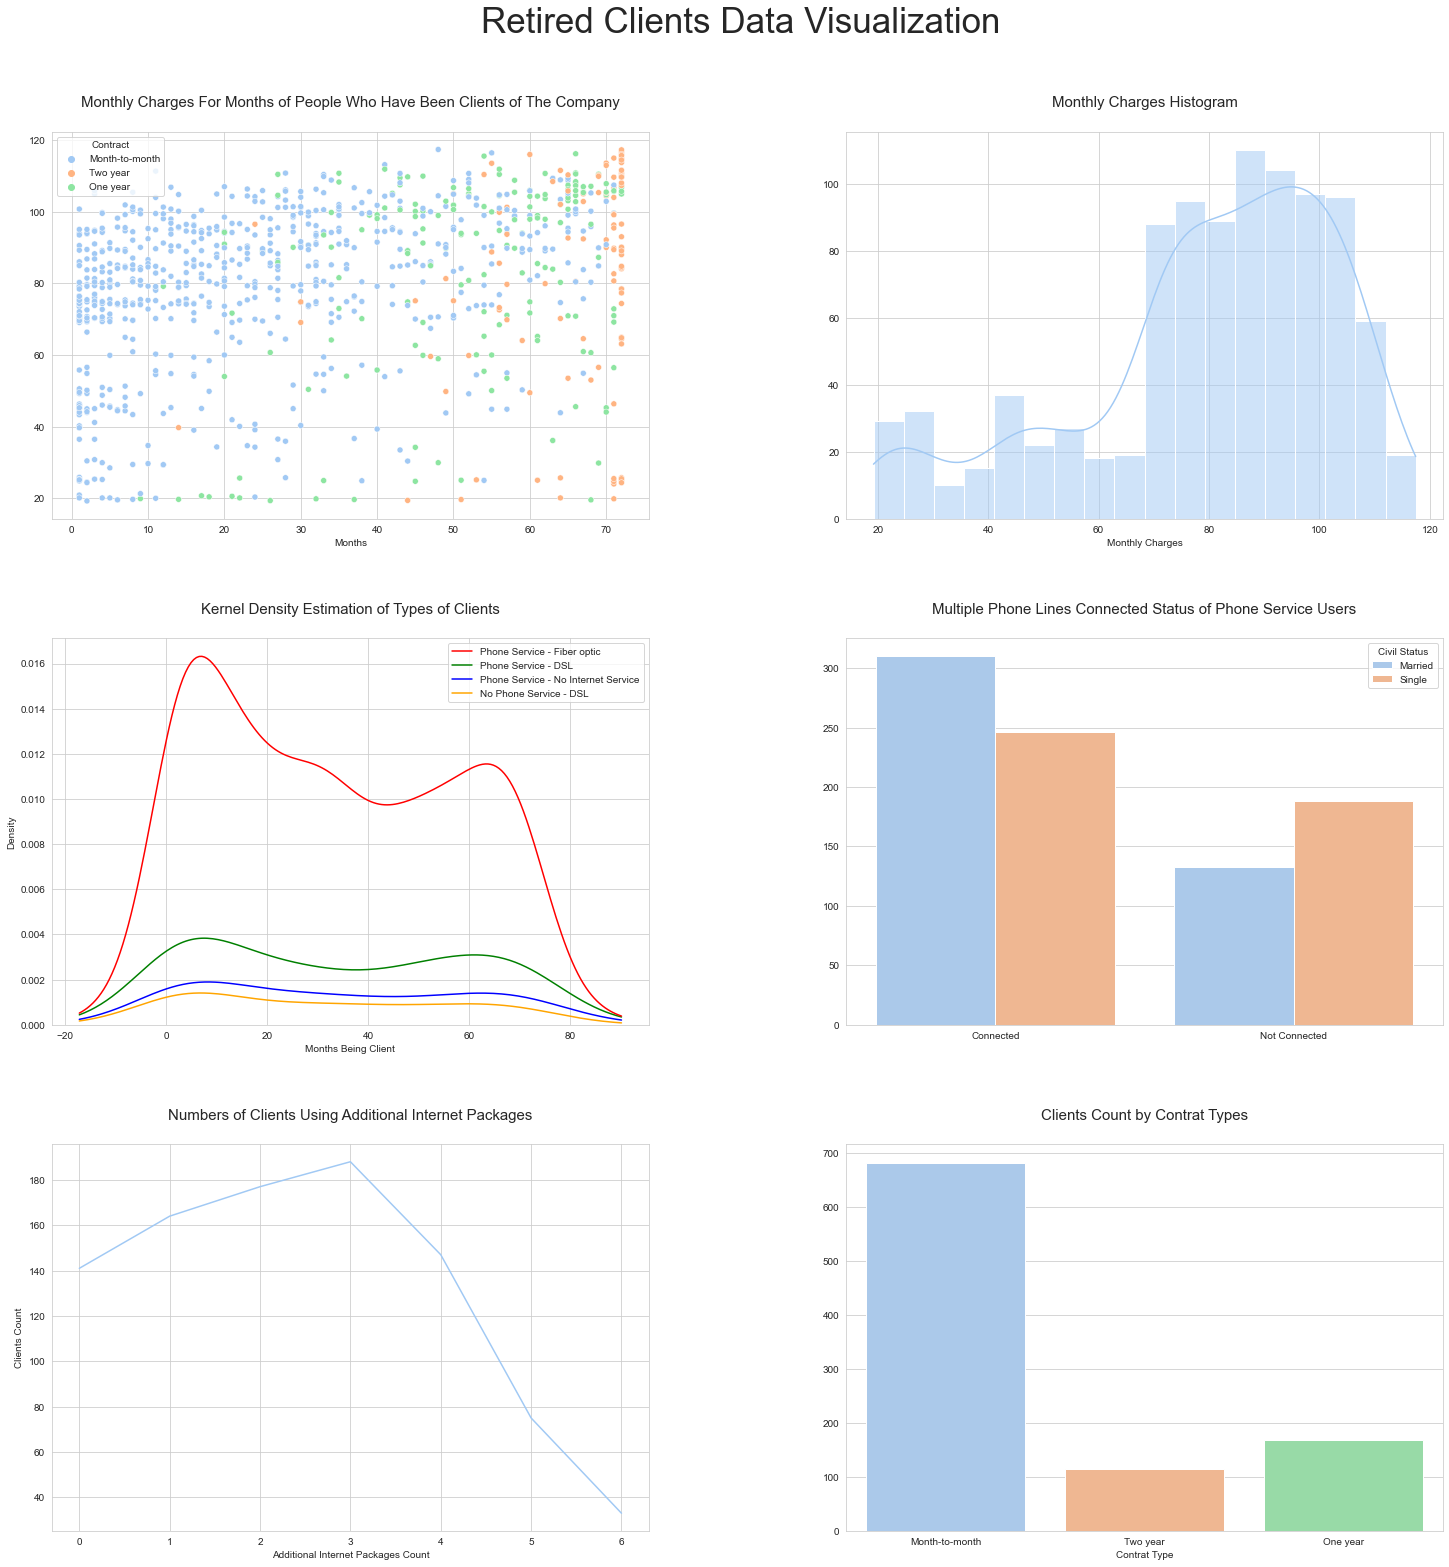

In [369]:
fig, ax=plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
fig.tight_layout(w_pad=17, h_pad=10)


plt.sca(ax[0, 0])
sns.scatterplot(x=lostCustomers.months, y=lostCustomers.MonthlyCharges, hue=lostCustomers.Contract)
ax[0, 0].set_title("Monthly Charges For Months of People Who Have Been Clients of The Company", fontsize=15, pad=25)
plt.xlabel("Months")
plt.ylabel("")


plt.sca(ax[0, 1])
sns.histplot(x=lostCustomers.MonthlyCharges, kde=True)
ax[0, 1].set_title("Monthly Charges Histogram", fontsize=15, pad=25)
plt.xlabel("Monthly Charges")
plt.ylabel("")


plt.sca(ax[1, 0])
sns.kdeplot(x=lostCustomers.months, hue=lostCustomers.PhoneService.replace({"Yes":"Phone Service", "No":"No Phone Service"})
             +" - "+lostCustomers.InternetService.replace({"No":"No Internet Service"}), multiple="stack", fill=False, palette=["red", "green", "blue", "orange"])
ax[1, 0].set_title("Kernel Density Estimation of Types of Clients", fontsize=15, pad=25)
plt.xlabel("Months Being Client")


plt.sca(ax[1, 1])
sns.countplot(x=lostCustomers[lostCustomers.PhoneService=="Yes"].MultipleLines, hue=lostCustomers.married)
plt.legend(title="Civil Status", labels=["Married", "Single"])
ax[1, 1].set_xticklabels(["Connected", "Not Connected"])
ax[1, 1].set_title("Multiple Phone Lines Connected Status of Phone Service Users", fontsize=15, pad=25)
plt.ylabel("")
plt.xlabel("")


plt.sca(ax[2, 0])

internetService=lostCustomers[lostCustomers.InternetService!="No"]
internetService=internetService[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]]
internetService.reset_index(drop=True, inplace=True)
adittionalPacks={x:0 for x in range(7)}

for x in range(internetService.shape[0]):
    key=internetService.iloc[x].tolist().count("Yes")
    adittionalPacks[key]=adittionalPacks.get(key, 0)+1    
    
sns.lineplot(x=adittionalPacks.keys(), y=adittionalPacks.values())
ax[2, 0].set_title("Numbers of Clients Using Additional Internet Packages", fontsize=15, pad=25)
plt.xlabel("Additional Internet Packages Count")
plt.ylabel("Clients Count")


plt.sca(ax[2, 1])
ax[2, 1].set_title("")
sns.countplot(x=lostCustomers.Contract)
ax[2, 1].set_title("Clients Count by Contrat Types", fontsize=15, pad=25)
plt.xlabel("Contrat Type")
plt.ylabel("")

plt.suptitle("Retired Clients Data Visualization", fontsize=35, y=1.077)
plt.show()

We can see that retired customers if they had many additional packages, could consider price reductions. Having made these visualizations about the retired clients we have not been able to obtain profiles, what if we use the data of the retired and not retired, categorizing them by the money they spend monthly first? (So we dont have to individually look at additional packages)

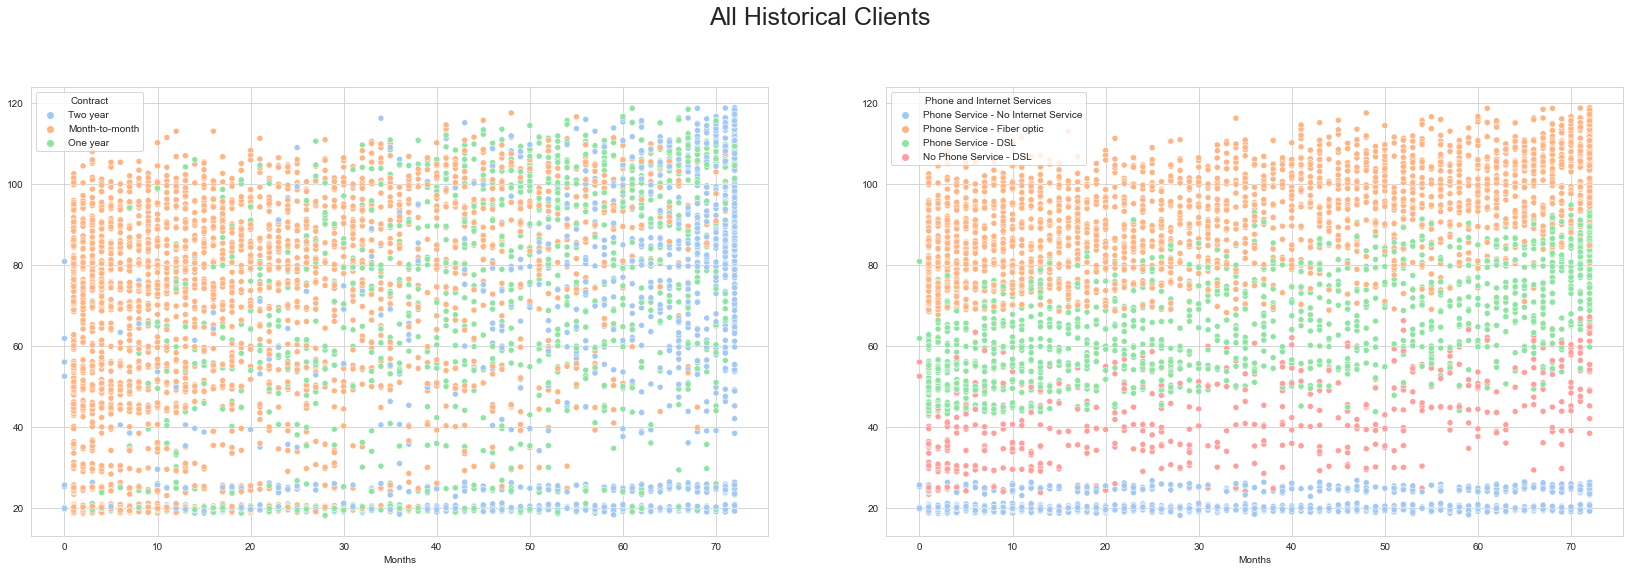

In [370]:
mix_df=df[["Partner", "tenure", "PhoneService", "InternetService", "MonthlyCharges", "Contract", "Churn"]].rename(columns={"tenure":"months", "Partner": "married"}).copy()

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(25, 9))
fig.tight_layout(pad=9)
plt.suptitle("All Historical Clients", fontsize=25,)


plt.sca(ax[0])
sns.scatterplot(x=mix_df.months, y=mix_df.MonthlyCharges, hue=mix_df.Contract)
plt.ylabel("")
plt.xlabel("Months")

plt.sca(ax[1])
sns.scatterplot(x=mix_df.months, y=mix_df.MonthlyCharges, hue=
                mix_df.PhoneService.replace({"Yes":"Phone Service", "No":"No Phone Service"})
                +" - "+mix_df.InternetService.replace({"No":"No Internet Service"}))
plt.ylabel("")
plt.xlabel("Months")
plt.legend(title="Phone and Internet Services")

plt.show()

Wow! There has been no one who has only used fiber optic without phone service! How about we take a look at people for combinations of internet and phone services?

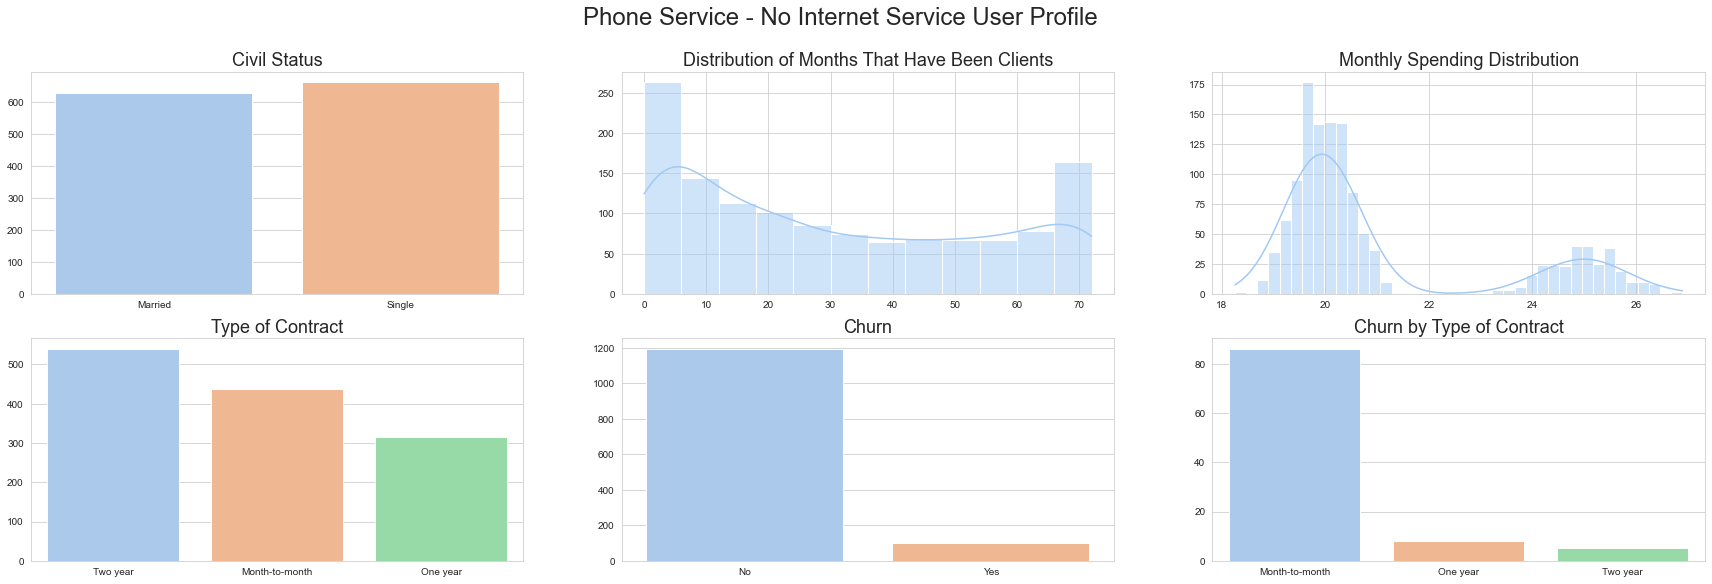

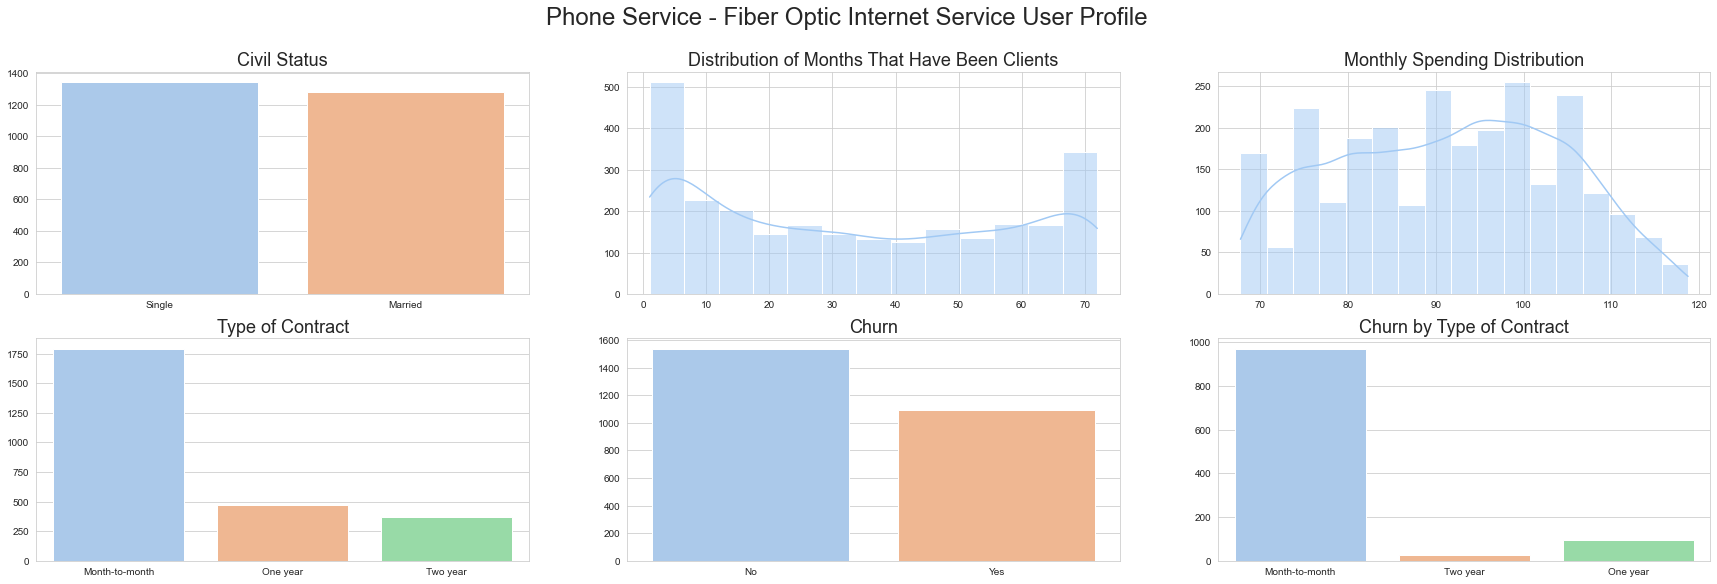

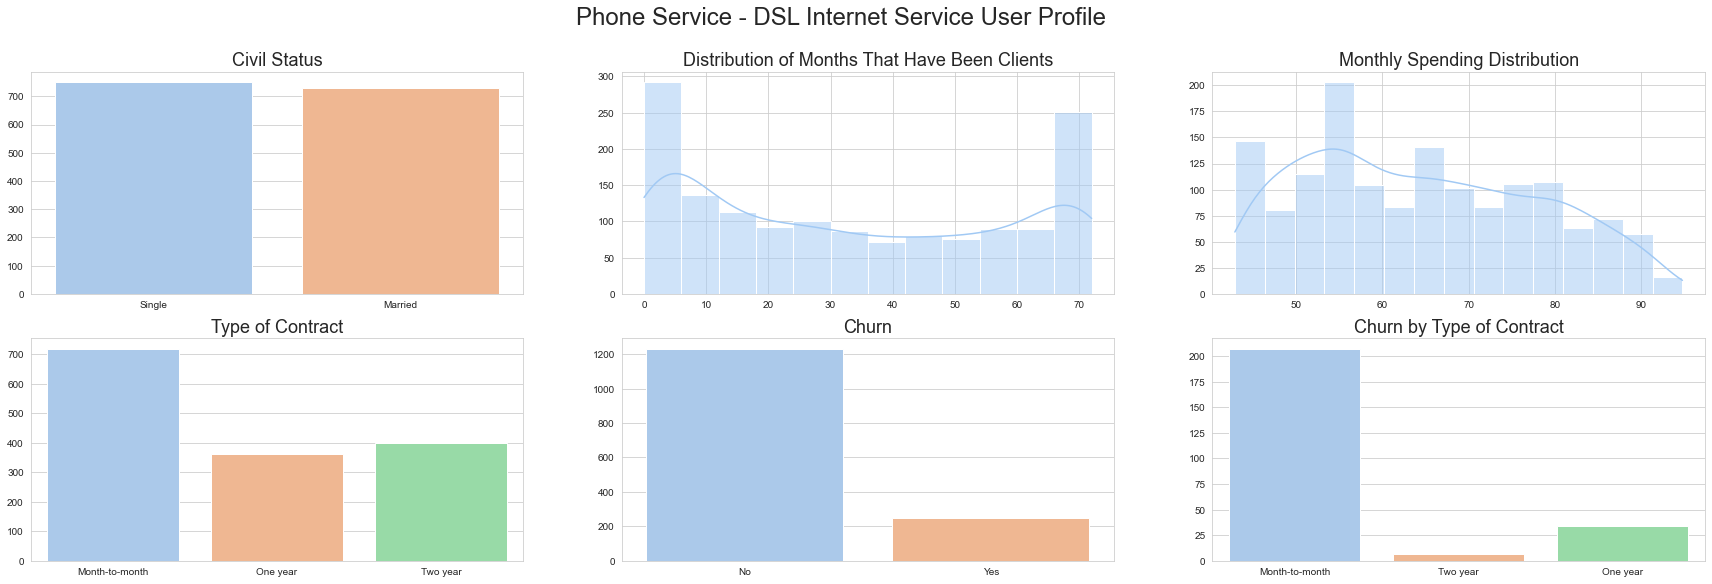

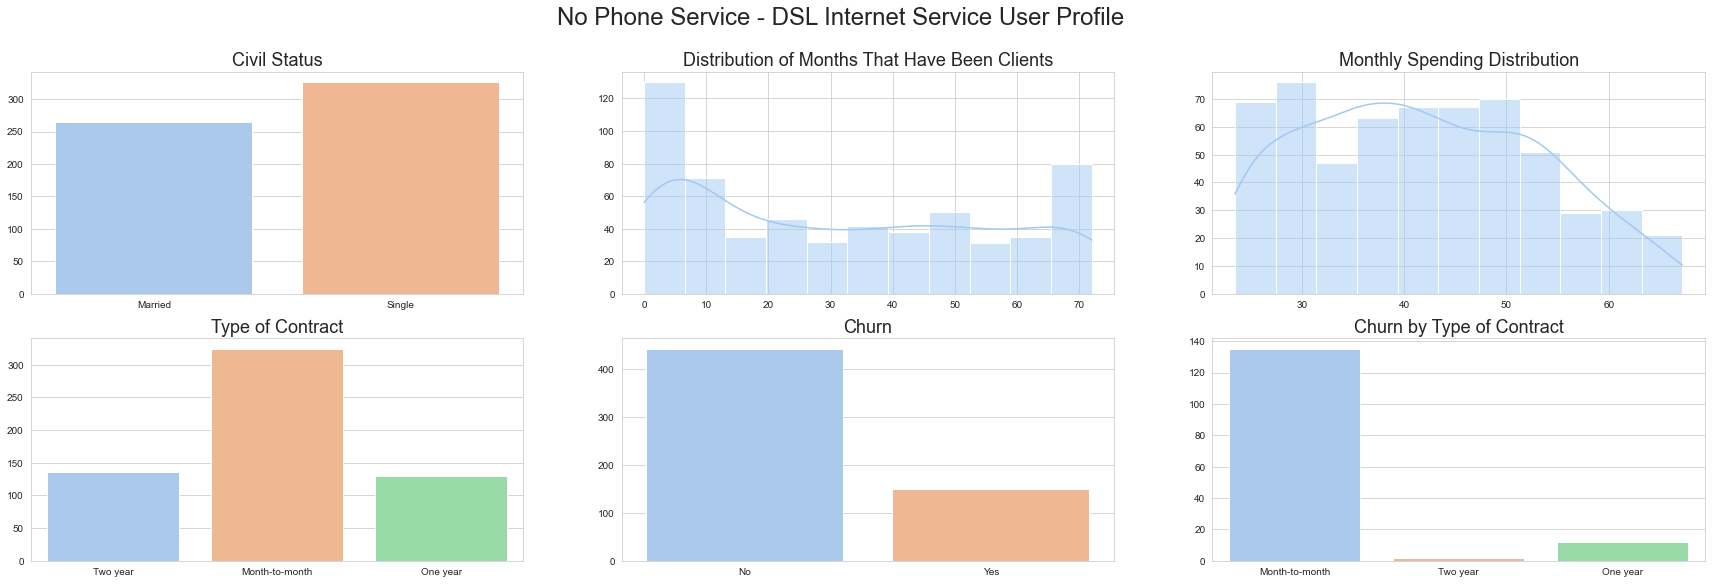

In [371]:
profilesByServices={"Phone Service - No Internet Service":mix_df[(mix_df.PhoneService=="Yes") & (mix_df.InternetService=="No")],
                   "Phone Service - Fiber Optic Internet Service":mix_df[(mix_df.PhoneService=="Yes") & (mix_df.InternetService=="Fiber optic")],
                   "Phone Service - DSL Internet Service":mix_df[(mix_df.PhoneService=="Yes") & (mix_df.InternetService=="DSL")],
                   "No Phone Service - DSL Internet Service":mix_df[(mix_df.PhoneService=="No") & (mix_df.InternetService=="DSL")]}

for profile_name in profilesByServices.keys():
    fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(30, 9))
    plt.suptitle(profile_name+" User Profile", fontsize=24)
    
    plt.sca(ax[0, 0])
    ax[0, 0].set_title("Civil Status", fontsize=18)
    sns.countplot(x=profilesByServices.get(profile_name, 0).married.replace({"Yes":"Married", "No":"Single"}))
    plt.ylabel("") 
    plt.xlabel("")
    
    plt.sca(ax[0, 1])
    ax[0, 1].set_title("Distribution of Months That Have Been Clients", fontsize=18)
    sns.histplot(x=profilesByServices.get(profile_name, 0).months, kde=True)
    plt.ylabel("") 
    plt.xlabel("")
    
    plt.sca(ax[0, 2])
    ax[0, 2].set_title("Monthly Spending Distribution", fontsize=18)
    sns.histplot(x=profilesByServices.get(profile_name, 0).MonthlyCharges, kde=True)
    plt.ylabel("") 
    plt.xlabel("")
    
    plt.sca(ax[1, 0])
    ax[1, 0].set_title("Type of Contract", fontsize=18)
    sns.countplot(x=profilesByServices.get(profile_name, 0).Contract)
    plt.ylabel("") 
    plt.xlabel("")
    
    plt.sca(ax[1, 1])
    ax[1, 1].set_title("Churn", fontsize=18)
    sns.countplot(x=profilesByServices.get(profile_name, 0).Churn)
    plt.ylabel("") 
    plt.xlabel("")
    
    plt.sca(ax[1, 2])
    ax[1, 2].set_title("Churn by Type of Contract", fontsize=18)
    sns.countplot(x=profilesByServices.get(profile_name, 0)[profilesByServices.get(profile_name, 0).Churn=="Yes"].Contract)
    plt.ylabel("") 
    plt.xlabel("")
    
    plt.show()
    print("\n\n")

As we have seen before in the distribution of customers who left the Telecom service, we see here again that the customers who have had fiber optic and telephone services have been the ones who have left the Telecom services the most. Let's dive deeper into customer cancellation rate.

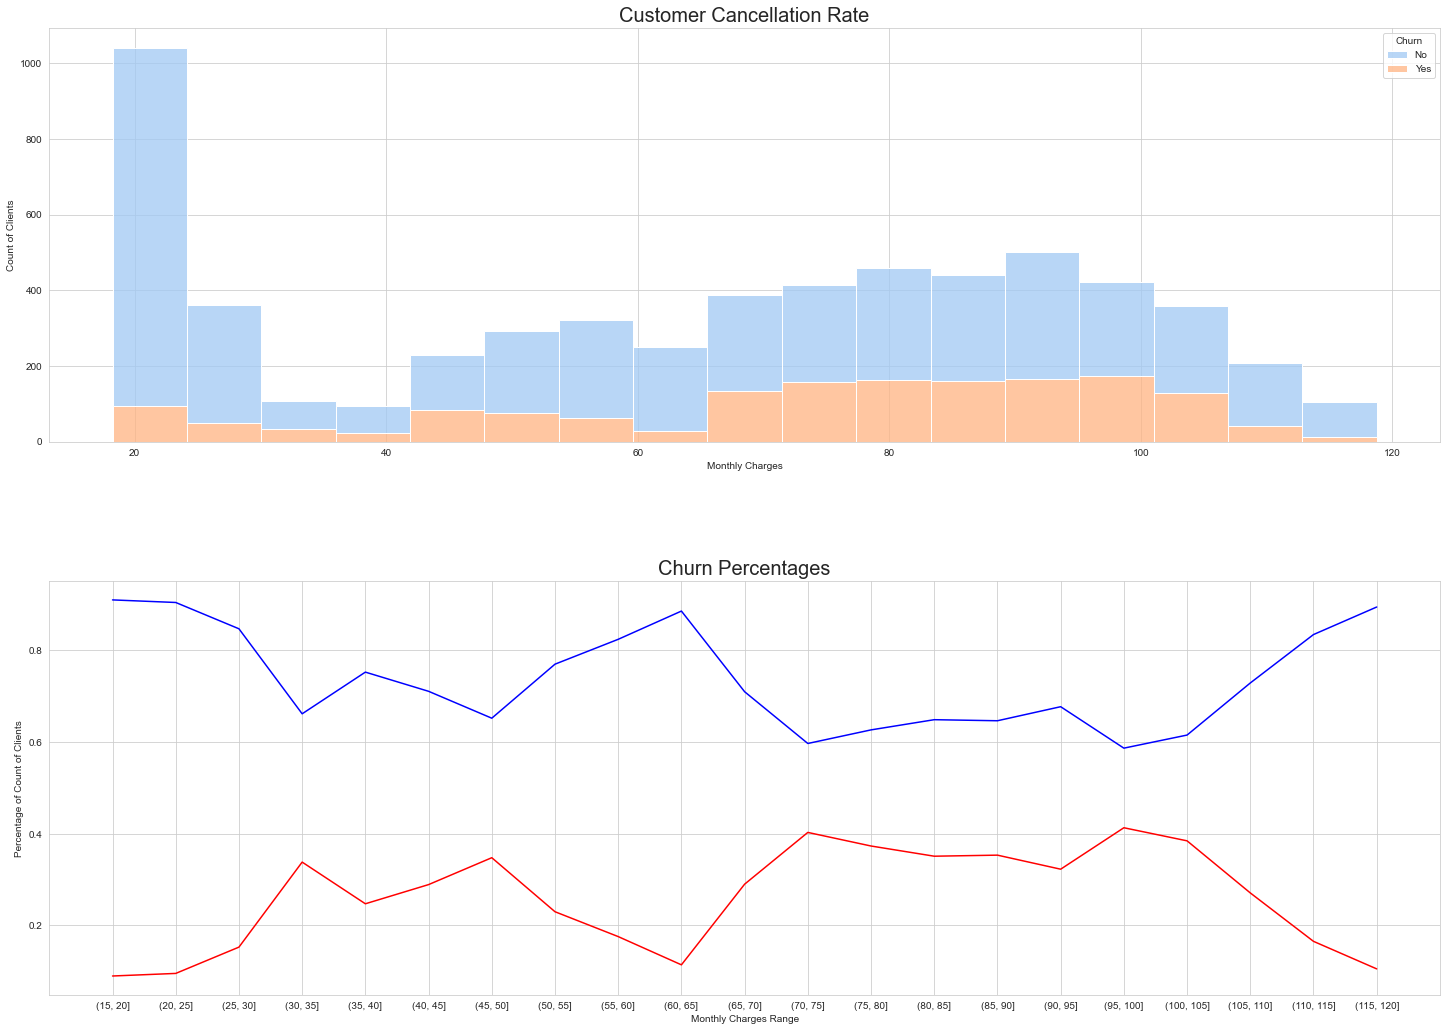

In [372]:
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(20,14))
fig.tight_layout(h_pad=12)



plt.sca(ax[0])
ax[0].set_title("Customer Cancellation Rate", fontsize=20)
sns.histplot(x=mix_df.MonthlyCharges, hue=mix_df.Churn, multiple="stack")
plt.ylabel("Count of Clients")
plt.xlabel("Monthly Charges")



plt.sca(ax[1])
ax[1].set_title("Churn Percentages", fontsize=20)

categorical_df=df.copy()
categorical_df.MonthlyCharges=pd.cut(x=categorical_df.MonthlyCharges, bins=[x for x in range(15, 121, 5)])

categorical_churn=pd.DataFrame(categorical_df.groupby("MonthlyCharges")["Churn"].value_counts(normalize=True))
categorical_churn.iloc[:: 2]
categorical_churn.iloc[1:: 2]

indices=["("+str(x)+", "+str(5+x)+"]" for x in range(15, 120, 5)]

sns.lineplot(y=categorical_churn.iloc[:: 2].Churn, x=indices, color="blue")
sns.lineplot(y=categorical_churn.iloc[1:: 2].Churn, x=indices, color="red")
plt.ylabel("Percentage of Count of Clients")
plt.xlabel("Monthly Charges Range")

plt.show()

Something is happening in the range 70-105! Let's see the characteristics of only those who left Telecom in that range.

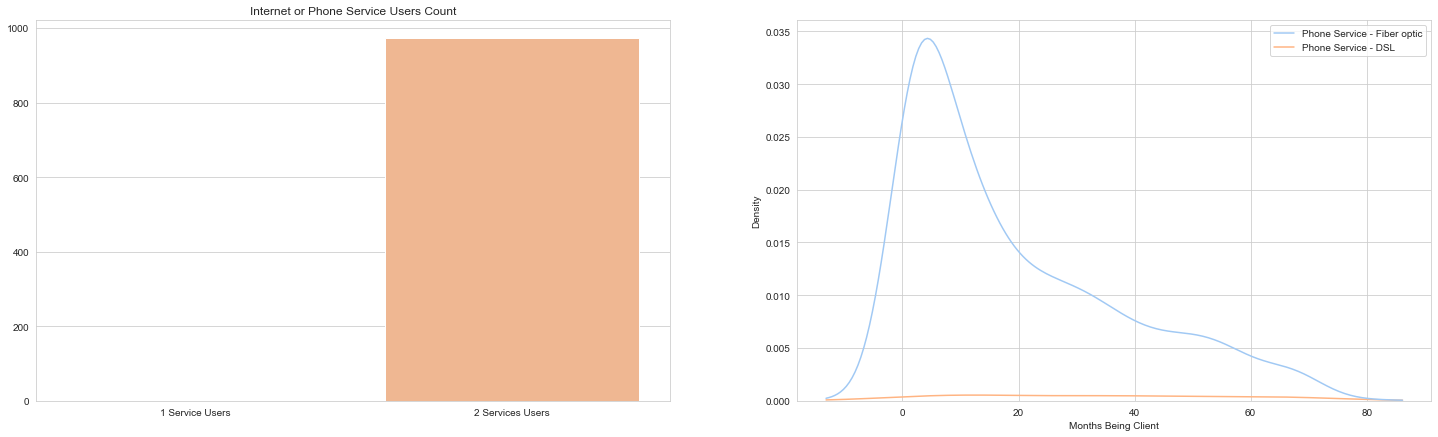

In [398]:
fig, ax=plt.subplots(ncols=2, nrows=1, figsize=(25, 7))

range_df=df[(df.MonthlyCharges>=70)&(df.MonthlyCharges<=105)&(df.Churn=="Yes")].copy()
_2ServiceUsers=range_df[(range_df.PhoneService=="Yes")&(range_df.InternetService!="No")].shape[0]

plt.sca(ax[0])
sns.barplot(x=["1 Service Users", "2 Services Users"], y=[range_df.shape[0]-_2ServiceUsers, _2ServiceUsers])
ax[0].set_title("Internet or Phone Service Users Count")

plt.sca(ax[1])
sns.kdeplot(x=range_df.tenure, hue=range_df.PhoneService.replace({"Yes":"Phone Service", "No":"No Phone Service"})
             +" - "+range_df.InternetService.replace({"No":"No Internet Service"}), multiple="stack", fill=False)
plt.xlabel("Months Being Client")

plt.show()